In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD


import seaborn as sns
import math
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


E_N2 = -562.69889650491
df = pd.read_csv("./final_dataset.csv")
df = df.drop(["Unnamed: 0.2", "Unnamed: 0","Unnamed: 0.1"], axis=1)
df["E_ads_N"] = df["energy_slab_N"] - df["energy_slab"] - 0.5 * E_N2
df = df[df["E_ads_N"] < 10]
df = df.dropna()

X = df.drop(["energy_slab_N", "energy_slab", "E_ads_N", "structure"], axis=1)
y = df["E_ads_N"]
y = y.to_numpy()


from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

scaler=StandardScaler()
scaler.fit(X)
scaler.fit(X)

X_scaled = scaler.transform(X)
# X_test_scaled = scaler.transform(X_test)

# def create_model():
    
#     model = Sequential()
#     model.add(Dense(32, input_dim=13, activation='relu'))
# #     model.add(Dense(16, activation='relu'))
#     #Output layer
#     model.add(Dense(1, activation='linear'))

#     model.compile(loss = 'mae' , optimizer = 'adam' , metrics = ['mae'] )

#     return model


# from sklearn.model_selection import KFold

# n_split=10

# for train_index,test_index in KFold(n_split).split(X_scaled):
#     x_train,x_test=X_scaled[train_index],X_scaled[test_index]
#     y_train,y_test=y[train_index],y[test_index]

#     model=create_model()
#     history = model.fit(x_train, y_train,validation_split=0.2, epochs =500)
  
#     print('Model evaluation ',model.evaluate(x_test,y_test))
    
    
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = list(range(1, len(loss) + 1))

# fig,ax = plt.subplots(figsize=(9,9))
# plt.plot(epochs,loss, 'y', label="Training loss")
# plt.plot(epochs,val_loss, 'r', label="Validation loss")
# plt.xlabel("Epochs",fontsize = 18)
# plt.ylabel("Loss",fontsize = 18)
# # plt.title("Linear Regression",fontsize = 18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.legend(prop={'size': 14})
# plt.savefig("loss.png")

# ann_train = model.predict(x_train)
# ann_test = model.predict(x_test)
# rmse_train = mean_squared_error(y_train, ann_train, squared=True)
# rmse_test = mean_squared_error(y_test, ann_test, squared=True)

# parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'gamma' : ('auto','scale')},

# svr = SVR()

# clf = GridSearchCV(svr, parameters, cv=10)
# clf.fit(x_train,y_train)
# clf.best_params_

# svr = SVR(kernel='rbf', C=1, gamma="auto")
# svr.fit(x_train, y_train)
# svr_train = svr.predict(x_train)
# svr_test = svr.predict(x_test)
# svr_rmse_train = mean_squared_error(y_train, svr_train, squared=False)
# svr_rmse_test = mean_squared_error(y_test, svr_test, squared=False)

In [100]:
X = df.drop(["energy_slab_N", "energy_slab", "E_ads_N", "structure"], axis=1)
y = df["E_ads_N"]
y = y.to_numpy()

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

scaler=StandardScaler()
scaler.fit(X)
scaler.fit(X)

X_scaled = scaler.transform(X)
# X_test_scaled = scaler.transform(X_test)

In [26]:
def create_model():
    
    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu'))
#     model.add(Dense(16, activation='relu'))
    #Output layer
    model.add(Dense(1, activation='linear'))

    model.compile(loss = 'mae' , optimizer = 'adam' , metrics = ['mae'] )

    return model

In [29]:
from sklearn.model_selection import KFold

evaluation_train = []
evaluation_test = []
n_split=10

for train_index,test_index in KFold(n_split).split(X_scaled):
    x_train,x_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]

    model=create_model()
    history = model.fit(x_train, y_train,validation_split=0.2, epochs =500)
  
    evaluation_train.append(model.evaluate(x_train,y_train))
    evaluation_test.append(model.evaluate(x_test,y_test))

Epoch 1/500
16/16 [==============================] - 0s 5ms/step - loss: 1.4364 - mae: 1.4364 - val_loss: 0.6633 - val_mae: 0.6633
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 1.2553 - mae: 1.2553 - val_loss: 0.6206 - val_mae: 0.6206
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 1.1219 - mae: 1.1219 - val_loss: 0.6341 - val_mae: 0.6341
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0190 - mae: 1.0190 - val_loss: 0.6633 - val_mae: 0.6633
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9634 - mae: 0.9634 - val_loss: 0.6953 - val_mae: 0.6953
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9404 - mae: 0.9404 - val_loss: 0.7227 - val_mae: 0.7227
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.9309 - mae: 0.9309 - val_loss: 0.7317 - val_mae: 0.7317
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9187 - m

16/16 [==============================] - 0s 1ms/step - loss: 0.7555 - mae: 0.7555 - val_loss: 0.6937 - val_mae: 0.6937
Epoch 64/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7516 - mae: 0.7516 - val_loss: 0.6886 - val_mae: 0.6886
Epoch 65/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7492 - mae: 0.7492 - val_loss: 0.6787 - val_mae: 0.6787
Epoch 66/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7487 - mae: 0.7487 - val_loss: 0.6849 - val_mae: 0.6849
Epoch 67/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7460 - mae: 0.7460 - val_loss: 0.6930 - val_mae: 0.6930
Epoch 68/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7510 - mae: 0.7510 - val_loss: 0.6941 - val_mae: 0.6941
Epoch 69/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7434 - mae: 0.7434 - val_loss: 0.6733 - val_mae: 0.6733
Epoch 70/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7515 - mae: 0

Epoch 125/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6956 - mae: 0.6956 - val_loss: 0.6039 - val_mae: 0.6039
Epoch 126/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6936 - mae: 0.6936 - val_loss: 0.6083 - val_mae: 0.6083
Epoch 127/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6963 - mae: 0.6963 - val_loss: 0.6190 - val_mae: 0.6190
Epoch 128/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6975 - mae: 0.6975 - val_loss: 0.6068 - val_mae: 0.6068
Epoch 129/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6983 - mae: 0.6983 - val_loss: 0.6283 - val_mae: 0.6283
Epoch 130/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6962 - mae: 0.6962 - val_loss: 0.6067 - val_mae: 0.6067
Epoch 131/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6943 - mae: 0.6943 - val_loss: 0.6358 - val_mae: 0.6358
Epoch 132/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6735 - mae: 0.6735 - val_loss: 0.6089 - val_mae: 0.6089
Epoch 187/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6721 - mae: 0.6721 - val_loss: 0.6232 - val_mae: 0.6232
Epoch 188/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6733 - mae: 0.6733 - val_loss: 0.6061 - val_mae: 0.6061
Epoch 189/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6773 - mae: 0.6773 - val_loss: 0.6064 - val_mae: 0.6064
Epoch 190/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6789 - mae: 0.6789 - val_loss: 0.6329 - val_mae: 0.6329
Epoch 191/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6716 - mae: 0.6716 - val_loss: 0.6096 - val_mae: 0.6096
Epoch 192/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6728 - mae: 0.6728 - val_loss: 0.6204 - val_mae: 0.6204
Epoch 193/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6721 -

Epoch 248/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6567 - mae: 0.6567 - val_loss: 0.6168 - val_mae: 0.6168
Epoch 249/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6597 - mae: 0.6597 - val_loss: 0.6368 - val_mae: 0.6368
Epoch 250/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6585 - mae: 0.6585 - val_loss: 0.6253 - val_mae: 0.6253
Epoch 251/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6562 - mae: 0.6562 - val_loss: 0.6152 - val_mae: 0.6152
Epoch 252/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6582 - mae: 0.6582 - val_loss: 0.6293 - val_mae: 0.6293
Epoch 253/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6567 - mae: 0.6567 - val_loss: 0.6244 - val_mae: 0.6244
Epoch 254/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6577 - val_loss: 0.6186 - val_mae: 0.6186
Epoch 255/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6423 - mae: 0.6423 - val_loss: 0.6318 - val_mae: 0.6318
Epoch 310/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6432 - mae: 0.6432 - val_loss: 0.6273 - val_mae: 0.6273
Epoch 311/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6427 - mae: 0.6427 - val_loss: 0.6325 - val_mae: 0.6325
Epoch 312/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6422 - mae: 0.6422 - val_loss: 0.6234 - val_mae: 0.6234
Epoch 313/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6430 - mae: 0.6430 - val_loss: 0.6332 - val_mae: 0.6332
Epoch 314/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6426 - mae: 0.6426 - val_loss: 0.6290 - val_mae: 0.6290
Epoch 315/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6462 - mae: 0.6462 - val_loss: 0.6125 - val_mae: 0.6125
Epoch 316/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6460 -

Epoch 371/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6313 - mae: 0.6313 - val_loss: 0.6387 - val_mae: 0.6387
Epoch 372/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6363 - mae: 0.6363 - val_loss: 0.6381 - val_mae: 0.6381
Epoch 373/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6310 - mae: 0.6310 - val_loss: 0.6241 - val_mae: 0.6241
Epoch 374/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6287 - mae: 0.6287 - val_loss: 0.6318 - val_mae: 0.6318
Epoch 375/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6284 - mae: 0.6284 - val_loss: 0.6328 - val_mae: 0.6328
Epoch 376/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6286 - mae: 0.6286 - val_loss: 0.6334 - val_mae: 0.6334
Epoch 377/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6331 - mae: 0.6331 - val_loss: 0.6339 - val_mae: 0.6339
Epoch 378/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 1ms/step - loss: 0.6185 - mae: 0.6185 - val_loss: 0.6393 - val_mae: 0.6393
Epoch 433/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6189 - mae: 0.6189 - val_loss: 0.6282 - val_mae: 0.6282
Epoch 434/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6183 - mae: 0.6183 - val_loss: 0.6407 - val_mae: 0.6407
Epoch 435/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6170 - mae: 0.6170 - val_loss: 0.6290 - val_mae: 0.6290
Epoch 436/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6174 - mae: 0.6174 - val_loss: 0.6199 - val_mae: 0.6199
Epoch 437/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6174 - mae: 0.6174 - val_loss: 0.6289 - val_mae: 0.6289
Epoch 438/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6190 - mae: 0.6190 - val_loss: 0.6359 - val_mae: 0.6359
Epoch 439/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6159 -

Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6107 - mae: 0.6107 - val_loss: 0.6395 - val_mae: 0.6395
Epoch 495/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6135 - mae: 0.6135 - val_loss: 0.6462 - val_mae: 0.6462
Epoch 496/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6109 - mae: 0.6109 - val_loss: 0.6518 - val_mae: 0.6518
Epoch 497/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6123 - mae: 0.6123 - val_loss: 0.6436 - val_mae: 0.6436
Epoch 498/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6117 - mae: 0.6117 - val_loss: 0.6529 - val_mae: 0.6529
Epoch 499/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6119 - mae: 0.6119 - val_loss: 0.6482 - val_mae: 0.6482
Epoch 500/500
3/3 [==============================] - 0s 897us/step - loss: 1.9108 - mae: 1.9108
Epoch 1/500
16/16 [==============================] - 0s 5ms/step - loss: 1.6710 - mae: 1.6710 - val_loss: 

Epoch 55/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7743 - mae: 0.7743 - val_loss: 0.6816 - val_mae: 0.6816
Epoch 56/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7747 - mae: 0.7747 - val_loss: 0.6795 - val_mae: 0.6795
Epoch 57/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7710 - mae: 0.7710 - val_loss: 0.6927 - val_mae: 0.6927
Epoch 58/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7685 - mae: 0.7685 - val_loss: 0.6790 - val_mae: 0.6790
Epoch 59/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7686 - mae: 0.7686 - val_loss: 0.6600 - val_mae: 0.6600
Epoch 60/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7646 - mae: 0.7646 - val_loss: 0.6752 - val_mae: 0.6752
Epoch 61/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7622 - mae: 0.7622 - val_loss: 0.6659 - val_mae: 0.6659
Epoch 62/500
16/16 [==============================] - 0s 1ms/step - loss: 0.

Epoch 117/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7146 - mae: 0.7146 - val_loss: 0.6575 - val_mae: 0.6575
Epoch 118/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7118 - mae: 0.7118 - val_loss: 0.6764 - val_mae: 0.6764
Epoch 119/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7121 - mae: 0.7121 - val_loss: 0.6644 - val_mae: 0.6644
Epoch 120/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7122 - mae: 0.7122 - val_loss: 0.6603 - val_mae: 0.6603
Epoch 121/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7151 - mae: 0.7151 - val_loss: 0.6844 - val_mae: 0.6844
Epoch 122/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7133 - mae: 0.7133 - val_loss: 0.6605 - val_mae: 0.6605
Epoch 123/500
16/16 [==============================] - 0s 1ms/step - loss: 0.7158 - mae: 0.7158 - val_loss: 0.6766 - val_mae: 0.6766
Epoch 124/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 1ms/step - loss: 0.6958 - mae: 0.6958 - val_loss: 0.6748 - val_mae: 0.6748
Epoch 179/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6967 - mae: 0.6967 - val_loss: 0.6813 - val_mae: 0.6813
Epoch 180/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6946 - mae: 0.6946 - val_loss: 0.6749 - val_mae: 0.6749
Epoch 181/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6937 - mae: 0.6937 - val_loss: 0.6663 - val_mae: 0.6663
Epoch 182/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6945 - mae: 0.6945 - val_loss: 0.6802 - val_mae: 0.6802
Epoch 183/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6969 - mae: 0.6969 - val_loss: 0.6732 - val_mae: 0.6732
Epoch 184/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6943 - mae: 0.6943 - val_loss: 0.6711 - val_mae: 0.6711
Epoch 185/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6988 -

Epoch 240/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6850 - mae: 0.6850 - val_loss: 0.6684 - val_mae: 0.6684
Epoch 241/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6880 - mae: 0.6880 - val_loss: 0.6818 - val_mae: 0.6818
Epoch 242/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6878 - mae: 0.6878 - val_loss: 0.6722 - val_mae: 0.6722
Epoch 243/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6866 - mae: 0.6866 - val_loss: 0.6649 - val_mae: 0.6649
Epoch 244/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6856 - mae: 0.6856 - val_loss: 0.6683 - val_mae: 0.6683
Epoch 245/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6850 - mae: 0.6850 - val_loss: 0.6693 - val_mae: 0.6693
Epoch 246/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6849 - mae: 0.6849 - val_loss: 0.6671 - val_mae: 0.6671
Epoch 247/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6805 - mae: 0.6805 - val_loss: 0.6786 - val_mae: 0.6786
Epoch 302/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6829 - mae: 0.6829 - val_loss: 0.6706 - val_mae: 0.6706
Epoch 303/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6814 - mae: 0.6814 - val_loss: 0.6726 - val_mae: 0.6726
Epoch 304/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6772 - mae: 0.6772 - val_loss: 0.6619 - val_mae: 0.6619
Epoch 305/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6763 - mae: 0.6763 - val_loss: 0.6729 - val_mae: 0.6729
Epoch 306/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6748 - mae: 0.6748 - val_loss: 0.6585 - val_mae: 0.6585
Epoch 307/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6776 - mae: 0.6776 - val_loss: 0.6710 - val_mae: 0.6710
Epoch 308/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6761 -

Epoch 363/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6685 - mae: 0.6685 - val_loss: 0.6832 - val_mae: 0.6832
Epoch 364/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6687 - mae: 0.6687 - val_loss: 0.6851 - val_mae: 0.6851
Epoch 365/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6694 - mae: 0.6694 - val_loss: 0.6782 - val_mae: 0.6782
Epoch 366/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6671 - mae: 0.6671 - val_loss: 0.6857 - val_mae: 0.6857
Epoch 367/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6658 - mae: 0.6658 - val_loss: 0.6842 - val_mae: 0.6842
Epoch 368/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6686 - mae: 0.6686 - val_loss: 0.6966 - val_mae: 0.6966
Epoch 369/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6668 - mae: 0.6668 - val_loss: 0.6716 - val_mae: 0.6716
Epoch 370/500
16/16 [==============================] - 0s 1ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6532 - mae: 0.6532 - val_loss: 0.7090 - val_mae: 0.7090
Epoch 425/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6573 - mae: 0.6573 - val_loss: 0.7001 - val_mae: 0.7001
Epoch 426/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6530 - mae: 0.6530 - val_loss: 0.7113 - val_mae: 0.7113
Epoch 427/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6534 - mae: 0.6534 - val_loss: 0.7100 - val_mae: 0.7100
Epoch 428/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6563 - mae: 0.6563 - val_loss: 0.7100 - val_mae: 0.7100
Epoch 429/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6573 - mae: 0.6573 - val_loss: 0.7103 - val_mae: 0.7103
Epoch 430/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6554 - mae: 0.6554 - val_loss: 0.7217 - val_mae: 0.7217
Epoch 431/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6533 -

Epoch 486/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6417 - mae: 0.6417 - val_loss: 0.7559 - val_mae: 0.7559
Epoch 487/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6399 - mae: 0.6399 - val_loss: 0.7644 - val_mae: 0.7644
Epoch 488/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6390 - mae: 0.6390 - val_loss: 0.7615 - val_mae: 0.7615
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6437 - mae: 0.6437 - val_loss: 0.7513 - val_mae: 0.7513
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6444 - mae: 0.6444 - val_loss: 0.7576 - val_mae: 0.7576
Epoch 491/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6432 - mae: 0.6432 - val_loss: 0.7583 - val_mae: 0.7583
Epoch 492/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6393 - mae: 0.6393 - val_loss: 0.7573 - val_mae: 0.7573
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - 

Epoch 47/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8506 - mae: 0.8506 - val_loss: 0.5367 - val_mae: 0.5367
Epoch 48/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8491 - mae: 0.8491 - val_loss: 0.5432 - val_mae: 0.5432
Epoch 49/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8503 - mae: 0.8503 - val_loss: 0.5468 - val_mae: 0.5468
Epoch 50/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8468 - mae: 0.8468 - val_loss: 0.5367 - val_mae: 0.5367
Epoch 51/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8417 - mae: 0.8417 - val_loss: 0.5489 - val_mae: 0.5489
Epoch 52/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8429 - mae: 0.8429 - val_loss: 0.5481 - val_mae: 0.5481
Epoch 53/500
16/16 [==============================] - 0s 1ms/step - loss: 0.8397 - mae: 0.8397 - val_loss: 0.5349 - val_mae: 0.5349
Epoch 54/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

Epoch 109/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7871 - mae: 0.7871 - val_loss: 0.5332 - val_mae: 0.5332
Epoch 110/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7890 - mae: 0.7890 - val_loss: 0.5273 - val_mae: 0.5273
Epoch 111/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7844 - mae: 0.7844 - val_loss: 0.5368 - val_mae: 0.5368
Epoch 112/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7875 - mae: 0.7875 - val_loss: 0.5409 - val_mae: 0.5409
Epoch 113/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7844 - mae: 0.7844 - val_loss: 0.5408 - val_mae: 0.5408
Epoch 114/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7874 - mae: 0.7874 - val_loss: 0.5457 - val_mae: 0.5457
Epoch 115/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7845 - mae: 0.7845 - val_loss: 0.5327 - val_mae: 0.5327
Epoch 116/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7580 - mae: 0.7580 - val_loss: 0.5632 - val_mae: 0.5632
Epoch 171/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7595 - mae: 0.7595 - val_loss: 0.5656 - val_mae: 0.5656
Epoch 172/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7564 - mae: 0.7564 - val_loss: 0.5614 - val_mae: 0.5614
Epoch 173/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7576 - mae: 0.7576 - val_loss: 0.5591 - val_mae: 0.5591
Epoch 174/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7574 - mae: 0.7574 - val_loss: 0.5652 - val_mae: 0.5652
Epoch 175/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7561 - mae: 0.7561 - val_loss: 0.5655 - val_mae: 0.5655
Epoch 176/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7573 - mae: 0.7573 - val_loss: 0.5709 - val_mae: 0.5709
Epoch 177/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7572 -

Epoch 232/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7375 - mae: 0.7375 - val_loss: 0.5893 - val_mae: 0.5893
Epoch 233/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7385 - mae: 0.7385 - val_loss: 0.5878 - val_mae: 0.5878
Epoch 234/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7391 - mae: 0.7391 - val_loss: 0.5893 - val_mae: 0.5893
Epoch 235/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7362 - mae: 0.7362 - val_loss: 0.5954 - val_mae: 0.5954
Epoch 236/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7385 - mae: 0.7385 - val_loss: 0.5956 - val_mae: 0.5956
Epoch 237/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7421 - mae: 0.7421 - val_loss: 0.5959 - val_mae: 0.5959
Epoch 238/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7410 - mae: 0.7410 - val_loss: 0.5904 - val_mae: 0.5904
Epoch 239/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7228 - mae: 0.7228 - val_loss: 0.6137 - val_mae: 0.6137
Epoch 294/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7199 - mae: 0.7199 - val_loss: 0.6125 - val_mae: 0.6125
Epoch 295/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7196 - mae: 0.7196 - val_loss: 0.6168 - val_mae: 0.6168
Epoch 296/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7200 - mae: 0.7200 - val_loss: 0.6164 - val_mae: 0.6164
Epoch 297/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7185 - mae: 0.7185 - val_loss: 0.6175 - val_mae: 0.6175
Epoch 298/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7179 - mae: 0.7179 - val_loss: 0.6147 - val_mae: 0.6147
Epoch 299/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7219 - mae: 0.7219 - val_loss: 0.6177 - val_mae: 0.6177
Epoch 300/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7188 -

Epoch 355/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7074 - mae: 0.7074 - val_loss: 0.6388 - val_mae: 0.6388
Epoch 356/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7045 - mae: 0.7045 - val_loss: 0.6379 - val_mae: 0.6379
Epoch 357/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7062 - mae: 0.7062 - val_loss: 0.6428 - val_mae: 0.6428
Epoch 358/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7057 - mae: 0.7057 - val_loss: 0.6418 - val_mae: 0.6418
Epoch 359/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7035 - mae: 0.7035 - val_loss: 0.6452 - val_mae: 0.6452
Epoch 360/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7033 - mae: 0.7033 - val_loss: 0.6424 - val_mae: 0.6424
Epoch 361/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7017 - mae: 0.7017 - val_loss: 0.6486 - val_mae: 0.6486
Epoch 362/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6919 - mae: 0.6919 - val_loss: 0.6689 - val_mae: 0.6689
Epoch 417/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6891 - mae: 0.6891 - val_loss: 0.6625 - val_mae: 0.6625
Epoch 418/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6915 - mae: 0.6915 - val_loss: 0.6723 - val_mae: 0.6723
Epoch 419/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6865 - mae: 0.6865 - val_loss: 0.6650 - val_mae: 0.6650
Epoch 420/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6875 - mae: 0.6875 - val_loss: 0.6652 - val_mae: 0.6652
Epoch 421/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6882 - mae: 0.6882 - val_loss: 0.6664 - val_mae: 0.6664
Epoch 422/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6850 - mae: 0.6850 - val_loss: 0.6673 - val_mae: 0.6673
Epoch 423/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6848 -

Epoch 478/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6735 - mae: 0.6735 - val_loss: 0.7011 - val_mae: 0.7011
Epoch 479/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6702 - mae: 0.6702 - val_loss: 0.6985 - val_mae: 0.6985
Epoch 480/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6683 - mae: 0.6683 - val_loss: 0.7019 - val_mae: 0.7019
Epoch 481/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6700 - mae: 0.6700 - val_loss: 0.7055 - val_mae: 0.7055
Epoch 482/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - mae: 0.6744 - val_loss: 0.6985 - val_mae: 0.6985
Epoch 483/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6714 - mae: 0.6714 - val_loss: 0.7016 - val_mae: 0.7016
Epoch 484/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6762 - mae: 0.6762 - val_loss: 0.6983 - val_mae: 0.6983
Epoch 485/500
16/16 [==============================] - 0s 2ms/step - 

Epoch 39/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9570 - mae: 0.9570 - val_loss: 0.6670 - val_mae: 0.6670
Epoch 40/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9560 - mae: 0.9560 - val_loss: 0.6643 - val_mae: 0.6643
Epoch 41/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9552 - mae: 0.9552 - val_loss: 0.6585 - val_mae: 0.6585
Epoch 42/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9564 - mae: 0.9564 - val_loss: 0.6583 - val_mae: 0.6583
Epoch 43/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9539 - mae: 0.9539 - val_loss: 0.6731 - val_mae: 0.6731
Epoch 44/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9511 - mae: 0.9511 - val_loss: 0.6556 - val_mae: 0.6556
Epoch 45/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9507 - mae: 0.9507 - val_loss: 0.6516 - val_mae: 0.6516
Epoch 46/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9014 - mae: 0.9014 - val_loss: 0.6146 - val_mae: 0.6146
Epoch 102/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9007 - mae: 0.9007 - val_loss: 0.6074 - val_mae: 0.6074
Epoch 103/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9006 - mae: 0.9006 - val_loss: 0.6081 - val_mae: 0.6081
Epoch 104/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9008 - mae: 0.9008 - val_loss: 0.6048 - val_mae: 0.6048
Epoch 105/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8986 - mae: 0.8986 - val_loss: 0.6026 - val_mae: 0.6026
Epoch 106/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8977 - mae: 0.8977 - val_loss: 0.5919 - val_mae: 0.5919
Epoch 107/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8969 - mae: 0.8969 - val_loss: 0.5964 - val_mae: 0.5964
Epoch 108/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8963 -

Epoch 163/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8575 - mae: 0.8575 - val_loss: 0.6056 - val_mae: 0.6056
Epoch 164/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8591 - mae: 0.8591 - val_loss: 0.6056 - val_mae: 0.6056
Epoch 165/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8609 - mae: 0.8609 - val_loss: 0.6079 - val_mae: 0.6079
Epoch 166/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8551 - mae: 0.8551 - val_loss: 0.6035 - val_mae: 0.6035
Epoch 167/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8567 - mae: 0.8567 - val_loss: 0.6082 - val_mae: 0.6082
Epoch 168/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8569 - mae: 0.8569 - val_loss: 0.6141 - val_mae: 0.6141
Epoch 169/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8561 - mae: 0.8561 - val_loss: 0.6111 - val_mae: 0.6111
Epoch 170/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8272 - mae: 0.8272 - val_loss: 0.6363 - val_mae: 0.6363
Epoch 225/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8256 - mae: 0.8256 - val_loss: 0.6503 - val_mae: 0.6503
Epoch 226/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8343 - mae: 0.8343 - val_loss: 0.6354 - val_mae: 0.6354
Epoch 227/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8259 - mae: 0.8259 - val_loss: 0.6518 - val_mae: 0.6518
Epoch 228/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8336 - mae: 0.8336 - val_loss: 0.6448 - val_mae: 0.6448
Epoch 229/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8298 - mae: 0.8298 - val_loss: 0.6508 - val_mae: 0.6508
Epoch 230/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8263 - mae: 0.8263 - val_loss: 0.6310 - val_mae: 0.6310
Epoch 231/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8237 -

Epoch 286/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7976 - mae: 0.7976 - val_loss: 0.6613 - val_mae: 0.6613
Epoch 287/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7918 - mae: 0.7918 - val_loss: 0.6677 - val_mae: 0.6677
Epoch 288/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7943 - mae: 0.7943 - val_loss: 0.6558 - val_mae: 0.6558
Epoch 289/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7938 - mae: 0.7938 - val_loss: 0.6575 - val_mae: 0.6575
Epoch 290/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7945 - mae: 0.7945 - val_loss: 0.6655 - val_mae: 0.6655
Epoch 291/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7938 - mae: 0.7938 - val_loss: 0.6558 - val_mae: 0.6558
Epoch 292/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7925 - mae: 0.7925 - val_loss: 0.6706 - val_mae: 0.6706
Epoch 293/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7699 - mae: 0.7699 - val_loss: 0.6893 - val_mae: 0.6893
Epoch 348/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7714 - mae: 0.7714 - val_loss: 0.6954 - val_mae: 0.6954
Epoch 349/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7702 - mae: 0.7702 - val_loss: 0.6797 - val_mae: 0.6797
Epoch 350/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7685 - mae: 0.7685 - val_loss: 0.7027 - val_mae: 0.7027
Epoch 351/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7740 - mae: 0.7740 - val_loss: 0.6862 - val_mae: 0.6862
Epoch 352/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7723 - mae: 0.7723 - val_loss: 0.7032 - val_mae: 0.7032
Epoch 353/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7666 - mae: 0.7666 - val_loss: 0.6909 - val_mae: 0.6909
Epoch 354/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7648 -

Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7477 - mae: 0.7477 - val_loss: 0.7091 - val_mae: 0.7091
Epoch 410/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7523 - mae: 0.7523 - val_loss: 0.7154 - val_mae: 0.7154
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7499 - mae: 0.7499 - val_loss: 0.7150 - val_mae: 0.7150
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7559 - mae: 0.7559 - val_loss: 0.6973 - val_mae: 0.6973
Epoch 413/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7505 - mae: 0.7505 - val_loss: 0.7076 - val_mae: 0.7076
Epoch 414/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7496 - mae: 0.7496 - val_loss: 0.7082 - val_mae: 0.7082
Epoch 415/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7479 - mae: 0.7479 - val_loss: 0.7062 - val_mae: 0.7062
Epoch 416/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7416 - mae: 0.7416 - val_loss: 0.7078 - val_mae: 0.7078
Epoch 471/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7331 - mae: 0.7331 - val_loss: 0.7119 - val_mae: 0.7119
Epoch 472/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7364 - mae: 0.7364 - val_loss: 0.7212 - val_mae: 0.7212
Epoch 473/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7330 - mae: 0.7330 - val_loss: 0.7157 - val_mae: 0.7157
Epoch 474/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7324 - mae: 0.7324 - val_loss: 0.7067 - val_mae: 0.7067
Epoch 475/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7341 - mae: 0.7341 - val_loss: 0.7109 - val_mae: 0.7109
Epoch 476/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7302 - mae: 0.7302 - val_loss: 0.7157 - val_mae: 0.7157
Epoch 477/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7333 -

Epoch 31/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9574 - mae: 0.9574 - val_loss: 0.7924 - val_mae: 0.7924
Epoch 32/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9593 - mae: 0.9593 - val_loss: 0.7383 - val_mae: 0.7383
Epoch 33/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9540 - mae: 0.9540 - val_loss: 0.7766 - val_mae: 0.7766
Epoch 34/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9536 - mae: 0.9536 - val_loss: 0.7684 - val_mae: 0.7684
Epoch 35/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9517 - mae: 0.9517 - val_loss: 0.7847 - val_mae: 0.7847
Epoch 36/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9540 - mae: 0.9540 - val_loss: 0.8079 - val_mae: 0.8079
Epoch 37/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9541 - mae: 0.9541 - val_loss: 0.7391 - val_mae: 0.7391
Epoch 38/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9013 - mae: 0.9013 - val_loss: 0.6929 - val_mae: 0.6929
Epoch 94/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8964 - mae: 0.8964 - val_loss: 0.6622 - val_mae: 0.6622
Epoch 95/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8954 - mae: 0.8954 - val_loss: 0.6909 - val_mae: 0.6909
Epoch 96/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8956 - mae: 0.8956 - val_loss: 0.6934 - val_mae: 0.6934
Epoch 97/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8968 - mae: 0.8968 - val_loss: 0.6675 - val_mae: 0.6675
Epoch 98/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8980 - mae: 0.8980 - val_loss: 0.7070 - val_mae: 0.7070
Epoch 99/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8933 - mae: 0.8933 - val_loss: 0.6743 - val_mae: 0.6743
Epoch 100/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8946 - mae: 

Epoch 155/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8535 - mae: 0.8535 - val_loss: 0.6967 - val_mae: 0.6967
Epoch 156/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8492 - mae: 0.8492 - val_loss: 0.6434 - val_mae: 0.6434
Epoch 157/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8431 - mae: 0.8431 - val_loss: 0.6784 - val_mae: 0.6784
Epoch 158/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8432 - mae: 0.8432 - val_loss: 0.6838 - val_mae: 0.6838
Epoch 159/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8437 - mae: 0.8437 - val_loss: 0.6746 - val_mae: 0.6746
Epoch 160/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8401 - mae: 0.8401 - val_loss: 0.6725 - val_mae: 0.6725
Epoch 161/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8432 - mae: 0.8432 - val_loss: 0.6775 - val_mae: 0.6775
Epoch 162/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8072 - mae: 0.8072 - val_loss: 0.7033 - val_mae: 0.7033
Epoch 217/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8067 - mae: 0.8067 - val_loss: 0.7222 - val_mae: 0.7222
Epoch 218/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8046 - mae: 0.8046 - val_loss: 0.7068 - val_mae: 0.7068
Epoch 219/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8059 - mae: 0.8059 - val_loss: 0.7232 - val_mae: 0.7232
Epoch 220/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8020 - mae: 0.8020 - val_loss: 0.7275 - val_mae: 0.7275
Epoch 221/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8076 - mae: 0.8076 - val_loss: 0.7107 - val_mae: 0.7107
Epoch 222/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8098 - mae: 0.8098 - val_loss: 0.7594 - val_mae: 0.7594
Epoch 223/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8042 -

Epoch 278/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7720 - mae: 0.7720 - val_loss: 0.7856 - val_mae: 0.7856
Epoch 279/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7695 - mae: 0.7695 - val_loss: 0.7813 - val_mae: 0.7813
Epoch 280/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7669 - mae: 0.7669 - val_loss: 0.7849 - val_mae: 0.7849
Epoch 281/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7659 - mae: 0.7659 - val_loss: 0.7520 - val_mae: 0.7520
Epoch 282/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7662 - mae: 0.7662 - val_loss: 0.7864 - val_mae: 0.7864
Epoch 283/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7628 - mae: 0.7628 - val_loss: 0.7905 - val_mae: 0.7905
Epoch 284/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7621 - mae: 0.7621 - val_loss: 0.7842 - val_mae: 0.7842
Epoch 285/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.7406 - mae: 0.7406 - val_loss: 0.8042 - val_mae: 0.8042
Epoch 340/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7364 - mae: 0.7364 - val_loss: 0.8053 - val_mae: 0.8053
Epoch 341/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7360 - mae: 0.7360 - val_loss: 0.8143 - val_mae: 0.8143
Epoch 342/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7399 - mae: 0.7399 - val_loss: 0.7761 - val_mae: 0.7761
Epoch 343/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7377 - mae: 0.7377 - val_loss: 0.8121 - val_mae: 0.8121
Epoch 344/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7360 - mae: 0.7360 - val_loss: 0.8026 - val_mae: 0.8026
Epoch 345/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7453 - mae: 0.7453 - val_loss: 0.8132 - val_mae: 0.8132
Epoch 346/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7313 -

Epoch 401/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7236 - mae: 0.7236 - val_loss: 0.8061 - val_mae: 0.8061
Epoch 402/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7219 - mae: 0.7219 - val_loss: 0.7936 - val_mae: 0.7936
Epoch 403/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7180 - mae: 0.7180 - val_loss: 0.8122 - val_mae: 0.8122
Epoch 404/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7222 - mae: 0.7222 - val_loss: 0.8067 - val_mae: 0.8067
Epoch 405/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7229 - mae: 0.7229 - val_loss: 0.8164 - val_mae: 0.8164
Epoch 406/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7205 - mae: 0.7205 - val_loss: 0.8070 - val_mae: 0.8070
Epoch 407/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7211 - mae: 0.7211 - val_loss: 0.8476 - val_mae: 0.8476
Epoch 408/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7113 - mae: 0.7113 - val_loss: 0.8186 - val_mae: 0.8186
Epoch 463/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7111 - mae: 0.7111 - val_loss: 0.8137 - val_mae: 0.8137
Epoch 464/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7077 - mae: 0.7077 - val_loss: 0.8246 - val_mae: 0.8246
Epoch 465/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7087 - mae: 0.7087 - val_loss: 0.8176 - val_mae: 0.8176
Epoch 466/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7129 - mae: 0.7129 - val_loss: 0.8160 - val_mae: 0.8160
Epoch 467/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7090 - mae: 0.7090 - val_loss: 0.8134 - val_mae: 0.8134
Epoch 468/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7052 - mae: 0.7052 - val_loss: 0.8246 - val_mae: 0.8246
Epoch 469/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7061 -

Epoch 23/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9686 - mae: 0.9686 - val_loss: 0.7670 - val_mae: 0.7670
Epoch 24/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9644 - mae: 0.9644 - val_loss: 0.7747 - val_mae: 0.7747
Epoch 25/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9621 - mae: 0.9621 - val_loss: 0.7795 - val_mae: 0.7795
Epoch 26/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9597 - mae: 0.9597 - val_loss: 0.8031 - val_mae: 0.8031
Epoch 27/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9577 - mae: 0.9577 - val_loss: 0.7778 - val_mae: 0.7778
Epoch 28/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9544 - mae: 0.9544 - val_loss: 0.7726 - val_mae: 0.7726
Epoch 29/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9528 - mae: 0.9528 - val_loss: 0.7853 - val_mae: 0.7853
Epoch 30/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.8877 - mae: 0.8877 - val_loss: 0.7771 - val_mae: 0.7771
Epoch 86/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8884 - mae: 0.8884 - val_loss: 0.7586 - val_mae: 0.7586
Epoch 87/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8842 - mae: 0.8842 - val_loss: 0.7562 - val_mae: 0.7562
Epoch 88/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8835 - mae: 0.8835 - val_loss: 0.7554 - val_mae: 0.7554
Epoch 89/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8813 - mae: 0.8813 - val_loss: 0.7556 - val_mae: 0.7556
Epoch 90/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8814 - mae: 0.8814 - val_loss: 0.7564 - val_mae: 0.7564
Epoch 91/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8792 - mae: 0.8792 - val_loss: 0.7546 - val_mae: 0.7546
Epoch 92/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8805 - mae: 0

Epoch 147/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8352 - mae: 0.8352 - val_loss: 0.7533 - val_mae: 0.7533
Epoch 148/500
16/16 [==============================] - 0s 4ms/step - loss: 0.8318 - mae: 0.8318 - val_loss: 0.7593 - val_mae: 0.7593
Epoch 149/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8296 - mae: 0.8296 - val_loss: 0.7525 - val_mae: 0.7525
Epoch 150/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8301 - mae: 0.8301 - val_loss: 0.7608 - val_mae: 0.7608
Epoch 151/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8285 - mae: 0.8285 - val_loss: 0.7573 - val_mae: 0.7573
Epoch 152/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8282 - mae: 0.8282 - val_loss: 0.7651 - val_mae: 0.7651
Epoch 153/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8298 - mae: 0.8298 - val_loss: 0.7611 - val_mae: 0.7611
Epoch 154/500
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.7897 - mae: 0.7897 - val_loss: 0.8077 - val_mae: 0.8077
Epoch 209/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7889 - mae: 0.7889 - val_loss: 0.7986 - val_mae: 0.7986
Epoch 210/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7908 - mae: 0.7908 - val_loss: 0.8148 - val_mae: 0.8148
Epoch 211/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7884 - mae: 0.7884 - val_loss: 0.8053 - val_mae: 0.8053
Epoch 212/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7887 - mae: 0.7887 - val_loss: 0.8071 - val_mae: 0.8071
Epoch 213/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7849 - mae: 0.7849 - val_loss: 0.8047 - val_mae: 0.8047
Epoch 214/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7874 - mae: 0.7874 - val_loss: 0.8024 - val_mae: 0.8024
Epoch 215/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7838 -

Epoch 270/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7491 - mae: 0.7491 - val_loss: 0.8675 - val_mae: 0.8675
Epoch 271/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7546 - mae: 0.7546 - val_loss: 0.8530 - val_mae: 0.8530
Epoch 272/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7478 - mae: 0.7478 - val_loss: 0.8670 - val_mae: 0.8670
Epoch 273/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7500 - mae: 0.7500 - val_loss: 0.8621 - val_mae: 0.8621
Epoch 274/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7480 - mae: 0.7480 - val_loss: 0.8734 - val_mae: 0.8734
Epoch 275/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7513 - mae: 0.7513 - val_loss: 0.8549 - val_mae: 0.8549
Epoch 276/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7487 - mae: 0.7487 - val_loss: 0.8663 - val_mae: 0.8663
Epoch 277/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7269 - mae: 0.7269 - val_loss: 0.8780 - val_mae: 0.8780
Epoch 332/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7228 - mae: 0.7228 - val_loss: 0.8884 - val_mae: 0.8884
Epoch 333/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7222 - mae: 0.7222 - val_loss: 0.8764 - val_mae: 0.8764
Epoch 334/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7273 - mae: 0.7273 - val_loss: 0.8832 - val_mae: 0.8832
Epoch 335/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7283 - mae: 0.7283 - val_loss: 0.8818 - val_mae: 0.8818
Epoch 336/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7221 - mae: 0.7221 - val_loss: 0.8761 - val_mae: 0.8761
Epoch 337/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7192 - mae: 0.7192 - val_loss: 0.8874 - val_mae: 0.8874
Epoch 338/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7200 -

Epoch 393/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7067 - mae: 0.7067 - val_loss: 0.8889 - val_mae: 0.8889
Epoch 394/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7025 - mae: 0.7025 - val_loss: 0.9037 - val_mae: 0.9037
Epoch 395/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7009 - mae: 0.7009 - val_loss: 0.8762 - val_mae: 0.8762
Epoch 396/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7004 - mae: 0.7004 - val_loss: 0.8810 - val_mae: 0.8810
Epoch 397/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7005 - mae: 0.7005 - val_loss: 0.8931 - val_mae: 0.8931
Epoch 398/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7031 - mae: 0.7031 - val_loss: 0.8916 - val_mae: 0.8916
Epoch 399/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7021 - mae: 0.7021 - val_loss: 0.8896 - val_mae: 0.8896
Epoch 400/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.6877 - mae: 0.6877 - val_loss: 0.9045 - val_mae: 0.9045
Epoch 455/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6859 - mae: 0.6859 - val_loss: 0.8941 - val_mae: 0.8941
Epoch 456/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6877 - mae: 0.6877 - val_loss: 0.8943 - val_mae: 0.8943
Epoch 457/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6876 - mae: 0.6876 - val_loss: 0.8971 - val_mae: 0.8971
Epoch 458/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6858 - mae: 0.6858 - val_loss: 0.8996 - val_mae: 0.8996
Epoch 459/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6860 - mae: 0.6860 - val_loss: 0.9048 - val_mae: 0.9048
Epoch 460/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6850 - mae: 0.6850 - val_loss: 0.8981 - val_mae: 0.8981
Epoch 461/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6884 -

16/16 [==============================] - 0s 2ms/step - loss: 1.0474 - mae: 1.0474 - val_loss: 0.7373 - val_mae: 0.7373
Epoch 15/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0407 - mae: 1.0407 - val_loss: 0.7446 - val_mae: 0.7446
Epoch 16/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0362 - mae: 1.0362 - val_loss: 0.7485 - val_mae: 0.7485
Epoch 17/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0333 - mae: 1.0333 - val_loss: 0.7516 - val_mae: 0.7516
Epoch 18/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0259 - mae: 1.0259 - val_loss: 0.7256 - val_mae: 0.7256
Epoch 19/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0236 - mae: 1.0236 - val_loss: 0.7363 - val_mae: 0.7363
Epoch 20/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0218 - mae: 1.0218 - val_loss: 0.7483 - val_mae: 0.7483
Epoch 21/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0183 - mae: 1

16/16 [==============================] - 0s 2ms/step - loss: 0.9356 - mae: 0.9356 - val_loss: 0.7613 - val_mae: 0.7613
Epoch 77/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9354 - mae: 0.9354 - val_loss: 0.7467 - val_mae: 0.7467
Epoch 78/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9309 - mae: 0.9309 - val_loss: 0.7594 - val_mae: 0.7594
Epoch 79/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9308 - mae: 0.9308 - val_loss: 0.7492 - val_mae: 0.7492
Epoch 80/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9329 - mae: 0.9329 - val_loss: 0.7377 - val_mae: 0.7377
Epoch 81/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9283 - mae: 0.9283 - val_loss: 0.7490 - val_mae: 0.7490
Epoch 82/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9293 - mae: 0.9293 - val_loss: 0.7475 - val_mae: 0.7475
Epoch 83/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9279 - mae: 0

Epoch 138/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8750 - mae: 0.8750 - val_loss: 0.7254 - val_mae: 0.7254
Epoch 139/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8770 - mae: 0.8770 - val_loss: 0.7441 - val_mae: 0.7441
Epoch 140/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8731 - mae: 0.8731 - val_loss: 0.7371 - val_mae: 0.7371
Epoch 141/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8711 - mae: 0.8711 - val_loss: 0.7200 - val_mae: 0.7200
Epoch 142/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8753 - mae: 0.8753 - val_loss: 0.7481 - val_mae: 0.7481
Epoch 143/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8682 - mae: 0.8682 - val_loss: 0.7369 - val_mae: 0.7369
Epoch 144/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8696 - mae: 0.8696 - val_loss: 0.7360 - val_mae: 0.7360
Epoch 145/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8334 - mae: 0.8334 - val_loss: 0.7789 - val_mae: 0.7789
Epoch 200/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8373 - mae: 0.8373 - val_loss: 0.7894 - val_mae: 0.7894
Epoch 201/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8337 - mae: 0.8337 - val_loss: 0.8020 - val_mae: 0.8020
Epoch 202/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8309 - mae: 0.8309 - val_loss: 0.7767 - val_mae: 0.7767
Epoch 203/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8308 - mae: 0.8308 - val_loss: 0.8043 - val_mae: 0.8043
Epoch 204/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8327 - mae: 0.8327 - val_loss: 0.7702 - val_mae: 0.7702
Epoch 205/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8274 - mae: 0.8274 - val_loss: 0.7742 - val_mae: 0.7742
Epoch 206/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8286 -

Epoch 261/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7984 - mae: 0.7984 - val_loss: 0.8425 - val_mae: 0.8425
Epoch 262/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7947 - mae: 0.7947 - val_loss: 0.8372 - val_mae: 0.8372
Epoch 263/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7955 - mae: 0.7955 - val_loss: 0.8465 - val_mae: 0.8465
Epoch 264/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7992 - mae: 0.7992 - val_loss: 0.8588 - val_mae: 0.8588
Epoch 265/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7950 - mae: 0.7950 - val_loss: 0.8576 - val_mae: 0.8576
Epoch 266/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7964 - mae: 0.7964 - val_loss: 0.8686 - val_mae: 0.8686
Epoch 267/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7931 - mae: 0.7931 - val_loss: 0.8510 - val_mae: 0.8510
Epoch 268/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7732 - mae: 0.7732 - val_loss: 0.8696 - val_mae: 0.8696
Epoch 323/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7778 - mae: 0.7778 - val_loss: 0.9028 - val_mae: 0.9028
Epoch 324/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7691 - mae: 0.7691 - val_loss: 0.8740 - val_mae: 0.8740
Epoch 325/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7665 - mae: 0.7665 - val_loss: 0.8825 - val_mae: 0.8825
Epoch 326/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7758 - mae: 0.7758 - val_loss: 0.8860 - val_mae: 0.8860
Epoch 327/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7695 - mae: 0.7695 - val_loss: 0.8961 - val_mae: 0.8961
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7688 - mae: 0.7688 - val_loss: 0.8854 - val_mae: 0.8854
Epoch 329/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7700 -

Epoch 384/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7432 - mae: 0.7432 - val_loss: 0.9363 - val_mae: 0.9363
Epoch 385/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7419 - mae: 0.7419 - val_loss: 0.9084 - val_mae: 0.9084
Epoch 386/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7446 - mae: 0.7446 - val_loss: 0.9357 - val_mae: 0.9357
Epoch 387/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7476 - mae: 0.7476 - val_loss: 0.9184 - val_mae: 0.9184
Epoch 388/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7415 - mae: 0.7415 - val_loss: 0.9532 - val_mae: 0.9532
Epoch 389/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7415 - mae: 0.7415 - val_loss: 0.9323 - val_mae: 0.9323
Epoch 390/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7438 - mae: 0.7438 - val_loss: 0.9602 - val_mae: 0.9602
Epoch 391/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7297 - mae: 0.7297 - val_loss: 0.9572 - val_mae: 0.9572
Epoch 446/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7291 - mae: 0.7291 - val_loss: 0.9526 - val_mae: 0.9526
Epoch 447/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7267 - mae: 0.7267 - val_loss: 0.9535 - val_mae: 0.9535
Epoch 448/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7318 - mae: 0.7318 - val_loss: 0.9596 - val_mae: 0.9596
Epoch 449/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7249 - mae: 0.7249 - val_loss: 0.9576 - val_mae: 0.9576
Epoch 450/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7250 - mae: 0.7250 - val_loss: 0.9470 - val_mae: 0.9470
Epoch 451/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7308 - mae: 0.7308 - val_loss: 0.9593 - val_mae: 0.9593
Epoch 452/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7262 -

16/16 [==============================] - 0s 2ms/step - loss: 1.1820 - mae: 1.1820 - val_loss: 0.7373 - val_mae: 0.7373
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 1.1169 - mae: 1.1169 - val_loss: 0.7585 - val_mae: 0.7585
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0882 - mae: 1.0882 - val_loss: 0.7969 - val_mae: 0.7969
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0740 - mae: 1.0740 - val_loss: 0.8013 - val_mae: 0.8013
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0612 - mae: 1.0612 - val_loss: 0.8139 - val_mae: 0.8139
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0516 - mae: 1.0516 - val_loss: 0.7992 - val_mae: 0.7992
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0428 - mae: 1.0428 - val_loss: 0.7939 - val_mae: 0.7939
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0361 - mae: 1.036

16/16 [==============================] - 0s 2ms/step - loss: 0.9321 - mae: 0.9321 - val_loss: 0.7685 - val_mae: 0.7685
Epoch 68/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9319 - mae: 0.9319 - val_loss: 0.7716 - val_mae: 0.7716
Epoch 69/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9315 - mae: 0.9315 - val_loss: 0.7581 - val_mae: 0.7581
Epoch 70/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9307 - mae: 0.9307 - val_loss: 0.7752 - val_mae: 0.7752
Epoch 71/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9309 - mae: 0.9309 - val_loss: 0.7747 - val_mae: 0.7747
Epoch 72/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9284 - mae: 0.9284 - val_loss: 0.7542 - val_mae: 0.7542
Epoch 73/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9266 - mae: 0.9266 - val_loss: 0.7640 - val_mae: 0.7640
Epoch 74/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9285 - mae: 0

Epoch 129/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8872 - mae: 0.8872 - val_loss: 0.7736 - val_mae: 0.7736
Epoch 130/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8838 - mae: 0.8838 - val_loss: 0.7707 - val_mae: 0.7707
Epoch 131/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8815 - mae: 0.8815 - val_loss: 0.7940 - val_mae: 0.7940
Epoch 132/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8829 - mae: 0.8829 - val_loss: 0.7675 - val_mae: 0.7675
Epoch 133/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8805 - mae: 0.8805 - val_loss: 0.7668 - val_mae: 0.7668
Epoch 134/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8793 - mae: 0.8793 - val_loss: 0.7860 - val_mae: 0.7860
Epoch 135/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8784 - mae: 0.8784 - val_loss: 0.7677 - val_mae: 0.7677
Epoch 136/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8427 - mae: 0.8427 - val_loss: 0.7950 - val_mae: 0.7950
Epoch 191/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8404 - mae: 0.8404 - val_loss: 0.7790 - val_mae: 0.7790
Epoch 192/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8411 - mae: 0.8411 - val_loss: 0.7708 - val_mae: 0.7708
Epoch 193/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8411 - mae: 0.8411 - val_loss: 0.8021 - val_mae: 0.8021
Epoch 194/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8430 - mae: 0.8430 - val_loss: 0.7693 - val_mae: 0.7693
Epoch 195/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8398 - mae: 0.8398 - val_loss: 0.7901 - val_mae: 0.7901
Epoch 196/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8352 - mae: 0.8352 - val_loss: 0.7995 - val_mae: 0.7995
Epoch 197/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8359 -

Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8058 - mae: 0.8058 - val_loss: 0.8347 - val_mae: 0.8347
Epoch 253/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8063 - mae: 0.8063 - val_loss: 0.8193 - val_mae: 0.8193
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8034 - mae: 0.8034 - val_loss: 0.8408 - val_mae: 0.8408
Epoch 255/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8036 - mae: 0.8036 - val_loss: 0.8208 - val_mae: 0.8208
Epoch 256/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8027 - mae: 0.8027 - val_loss: 0.8234 - val_mae: 0.8234
Epoch 257/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8025 - mae: 0.8025 - val_loss: 0.8379 - val_mae: 0.8379
Epoch 258/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8039 - mae: 0.8039 - val_loss: 0.8167 - val_mae: 0.8167
Epoch 259/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.7733 - mae: 0.7733 - val_loss: 0.8441 - val_mae: 0.8441
Epoch 314/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7736 - mae: 0.7736 - val_loss: 0.8309 - val_mae: 0.8309
Epoch 315/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7765 - mae: 0.7765 - val_loss: 0.8285 - val_mae: 0.8285
Epoch 316/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7711 - mae: 0.7711 - val_loss: 0.8383 - val_mae: 0.8383
Epoch 317/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7749 - mae: 0.7749 - val_loss: 0.8627 - val_mae: 0.8627
Epoch 318/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7837 - mae: 0.7837 - val_loss: 0.8353 - val_mae: 0.8353
Epoch 319/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7815 - mae: 0.7815 - val_loss: 0.8305 - val_mae: 0.8305
Epoch 320/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7723 -

Epoch 375/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7609 - mae: 0.7609 - val_loss: 0.8439 - val_mae: 0.8439
Epoch 376/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7601 - mae: 0.7601 - val_loss: 0.8364 - val_mae: 0.8364
Epoch 377/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7577 - mae: 0.7577 - val_loss: 0.8436 - val_mae: 0.8436
Epoch 378/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7534 - mae: 0.7534 - val_loss: 0.8281 - val_mae: 0.8281
Epoch 379/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7537 - mae: 0.7537 - val_loss: 0.8400 - val_mae: 0.8400
Epoch 380/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7537 - mae: 0.7537 - val_loss: 0.8330 - val_mae: 0.8330
Epoch 381/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7529 - mae: 0.7529 - val_loss: 0.8421 - val_mae: 0.8421
Epoch 382/500
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.7434 - mae: 0.7434 - val_loss: 0.8559 - val_mae: 0.8559
Epoch 437/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7410 - mae: 0.7410 - val_loss: 0.8434 - val_mae: 0.8434
Epoch 438/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7458 - mae: 0.7458 - val_loss: 0.8419 - val_mae: 0.8419
Epoch 439/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7409 - mae: 0.7409 - val_loss: 0.8535 - val_mae: 0.8535
Epoch 440/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7411 - mae: 0.7411 - val_loss: 0.8496 - val_mae: 0.8496
Epoch 441/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7409 - mae: 0.7409 - val_loss: 0.8475 - val_mae: 0.8475
Epoch 442/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7447 - mae: 0.7447 - val_loss: 0.8490 - val_mae: 0.8490
Epoch 443/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7415 -

Epoch 498/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7313 - mae: 0.7313 - val_loss: 0.8601 - val_mae: 0.8601
Epoch 499/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7310 - mae: 0.7310 - val_loss: 0.8512 - val_mae: 0.8512
Epoch 500/500
3/3 [==============================] - 0s 1ms/step - loss: 0.8293 - mae: 0.8293
Epoch 1/500
16/16 [==============================] - 0s 8ms/step - loss: 1.4166 - mae: 1.4166 - val_loss: 0.7751 - val_mae: 0.7751
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3009 - mae: 1.3009 - val_loss: 0.7110 - val_mae: 0.7110
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 1.2014 - mae: 1.2014 - val_loss: 0.6566 - val_mae: 0.6566
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1.1224 - mae: 1.1224 - val_loss: 0.6568 - val_mae: 0.6568
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 1.0654 - mae: 1.0654 - val_loss: 0.7195 - v

Epoch 59/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9376 - mae: 0.9376 - val_loss: 0.7806 - val_mae: 0.7806
Epoch 60/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9366 - mae: 0.9366 - val_loss: 0.7551 - val_mae: 0.7551
Epoch 61/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9361 - mae: 0.9361 - val_loss: 0.7443 - val_mae: 0.7443
Epoch 62/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9336 - mae: 0.9336 - val_loss: 0.7618 - val_mae: 0.7618
Epoch 63/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9315 - mae: 0.9315 - val_loss: 0.7466 - val_mae: 0.7466
Epoch 64/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9323 - mae: 0.9323 - val_loss: 0.7554 - val_mae: 0.7554
Epoch 65/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9320 - mae: 0.9320 - val_loss: 0.7581 - val_mae: 0.7581
Epoch 66/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

Epoch 121/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8858 - mae: 0.8858 - val_loss: 0.7357 - val_mae: 0.7357
Epoch 122/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8841 - mae: 0.8841 - val_loss: 0.7587 - val_mae: 0.7587
Epoch 123/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8870 - mae: 0.8870 - val_loss: 0.7545 - val_mae: 0.7545
Epoch 124/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8833 - mae: 0.8833 - val_loss: 0.7706 - val_mae: 0.7706
Epoch 125/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8836 - mae: 0.8836 - val_loss: 0.7510 - val_mae: 0.7510
Epoch 126/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8836 - mae: 0.8836 - val_loss: 0.7577 - val_mae: 0.7577
Epoch 127/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8805 - mae: 0.8805 - val_loss: 0.7595 - val_mae: 0.7595
Epoch 128/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8479 - mae: 0.8479 - val_loss: 0.7620 - val_mae: 0.7620
Epoch 183/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8497 - mae: 0.8497 - val_loss: 0.7399 - val_mae: 0.7399
Epoch 184/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8527 - mae: 0.8527 - val_loss: 0.7719 - val_mae: 0.7719
Epoch 185/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8473 - mae: 0.8473 - val_loss: 0.7559 - val_mae: 0.7559
Epoch 186/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8478 - mae: 0.8478 - val_loss: 0.7874 - val_mae: 0.7874
Epoch 187/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8482 - mae: 0.8482 - val_loss: 0.7703 - val_mae: 0.7703
Epoch 188/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8504 - mae: 0.8504 - val_loss: 0.7761 - val_mae: 0.7761
Epoch 189/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8516 -

Epoch 244/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8282 - mae: 0.8282 - val_loss: 0.7957 - val_mae: 0.7957
Epoch 245/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8257 - mae: 0.8257 - val_loss: 0.7905 - val_mae: 0.7905
Epoch 246/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8258 - mae: 0.8258 - val_loss: 0.7877 - val_mae: 0.7877
Epoch 247/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8307 - mae: 0.8307 - val_loss: 0.7384 - val_mae: 0.7384
Epoch 248/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8268 - mae: 0.8268 - val_loss: 0.7836 - val_mae: 0.7836
Epoch 249/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8241 - mae: 0.8241 - val_loss: 0.7854 - val_mae: 0.7854
Epoch 250/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8241 - mae: 0.8241 - val_loss: 0.7760 - val_mae: 0.7760
Epoch 251/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8053 - mae: 0.8053 - val_loss: 0.7768 - val_mae: 0.7768
Epoch 306/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8079 - mae: 0.8079 - val_loss: 0.8677 - val_mae: 0.8677
Epoch 307/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8028 - mae: 0.8028 - val_loss: 0.8154 - val_mae: 0.8154
Epoch 308/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8018 - mae: 0.8018 - val_loss: 0.8247 - val_mae: 0.8247
Epoch 309/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8014 - mae: 0.8014 - val_loss: 0.8141 - val_mae: 0.8141
Epoch 310/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8023 - mae: 0.8023 - val_loss: 0.8278 - val_mae: 0.8278
Epoch 311/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8003 - mae: 0.8003 - val_loss: 0.8315 - val_mae: 0.8315
Epoch 312/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8059 -

Epoch 367/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7835 - mae: 0.7835 - val_loss: 0.8176 - val_mae: 0.8176
Epoch 368/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7816 - mae: 0.7816 - val_loss: 0.8140 - val_mae: 0.8140
Epoch 369/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7832 - mae: 0.7832 - val_loss: 0.8266 - val_mae: 0.8266
Epoch 370/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7823 - mae: 0.7823 - val_loss: 0.8101 - val_mae: 0.8101
Epoch 371/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7786 - mae: 0.7786 - val_loss: 0.8279 - val_mae: 0.8279
Epoch 372/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7806 - mae: 0.7806 - val_loss: 0.8358 - val_mae: 0.8358
Epoch 373/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7805 - mae: 0.7805 - val_loss: 0.8325 - val_mae: 0.8325
Epoch 374/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7639 - mae: 0.7639 - val_loss: 0.8247 - val_mae: 0.8247
Epoch 429/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7638 - mae: 0.7638 - val_loss: 0.8291 - val_mae: 0.8291
Epoch 430/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7631 - mae: 0.7631 - val_loss: 0.8285 - val_mae: 0.8285
Epoch 431/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7653 - mae: 0.7653 - val_loss: 0.8482 - val_mae: 0.8482
Epoch 432/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7641 - mae: 0.7641 - val_loss: 0.8104 - val_mae: 0.8104
Epoch 433/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7621 - mae: 0.7621 - val_loss: 0.8339 - val_mae: 0.8339
Epoch 434/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7621 - mae: 0.7621 - val_loss: 0.8404 - val_mae: 0.8404
Epoch 435/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7703 -

Epoch 490/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7511 - mae: 0.7511 - val_loss: 0.8549 - val_mae: 0.8549
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7495 - mae: 0.7495 - val_loss: 0.8644 - val_mae: 0.8644
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7508 - mae: 0.7508 - val_loss: 0.8329 - val_mae: 0.8329
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7481 - mae: 0.7481 - val_loss: 0.8207 - val_mae: 0.8207
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7498 - mae: 0.7498 - val_loss: 0.8581 - val_mae: 0.8581
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7502 - mae: 0.7502 - val_loss: 0.8264 - val_mae: 0.8264
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7507 - mae: 0.7507 - val_loss: 0.8420 - val_mae: 0.8420
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - 

Epoch 51/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9288 - mae: 0.9288 - val_loss: 0.7535 - val_mae: 0.7535
Epoch 52/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9276 - mae: 0.9276 - val_loss: 0.7350 - val_mae: 0.7350
Epoch 53/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9264 - mae: 0.9264 - val_loss: 0.7256 - val_mae: 0.7256
Epoch 54/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9261 - mae: 0.9261 - val_loss: 0.7275 - val_mae: 0.7275
Epoch 55/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9244 - mae: 0.9244 - val_loss: 0.7623 - val_mae: 0.7623
Epoch 56/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9219 - mae: 0.9219 - val_loss: 0.7191 - val_mae: 0.7191
Epoch 57/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9220 - mae: 0.9220 - val_loss: 0.7421 - val_mae: 0.7421
Epoch 58/500
16/16 [==============================] - 0s 2ms/step - loss: 0.

Epoch 113/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8608 - mae: 0.8608 - val_loss: 0.7295 - val_mae: 0.7295
Epoch 114/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.7132 - val_mae: 0.7132
Epoch 115/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8550 - mae: 0.8550 - val_loss: 0.7110 - val_mae: 0.7110
Epoch 116/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8561 - mae: 0.8561 - val_loss: 0.7218 - val_mae: 0.7218
Epoch 117/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8568 - mae: 0.8568 - val_loss: 0.7324 - val_mae: 0.7324
Epoch 118/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8575 - mae: 0.8575 - val_loss: 0.7294 - val_mae: 0.7294
Epoch 119/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8565 - mae: 0.8565 - val_loss: 0.7344 - val_mae: 0.7344
Epoch 120/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.8084 - mae: 0.8084 - val_loss: 0.7522 - val_mae: 0.7522
Epoch 175/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8086 - mae: 0.8086 - val_loss: 0.7386 - val_mae: 0.7386
Epoch 176/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8040 - mae: 0.8040 - val_loss: 0.7369 - val_mae: 0.7369
Epoch 177/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8034 - mae: 0.8034 - val_loss: 0.7381 - val_mae: 0.7381
Epoch 178/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8001 - mae: 0.8001 - val_loss: 0.7622 - val_mae: 0.7622
Epoch 179/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8006 - mae: 0.8006 - val_loss: 0.7113 - val_mae: 0.7113
Epoch 180/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8030 - mae: 0.8030 - val_loss: 0.7375 - val_mae: 0.7375
Epoch 181/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7989 -

Epoch 236/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7649 - mae: 0.7649 - val_loss: 0.7362 - val_mae: 0.7362
Epoch 237/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7696 - mae: 0.7696 - val_loss: 0.7643 - val_mae: 0.7643
Epoch 238/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7660 - mae: 0.7660 - val_loss: 0.7627 - val_mae: 0.7627
Epoch 239/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7671 - mae: 0.7671 - val_loss: 0.7334 - val_mae: 0.7334
Epoch 240/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7736 - mae: 0.7736 - val_loss: 0.7652 - val_mae: 0.7652
Epoch 241/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7643 - mae: 0.7643 - val_loss: 0.7245 - val_mae: 0.7245
Epoch 242/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7634 - mae: 0.7634 - val_loss: 0.7653 - val_mae: 0.7653
Epoch 243/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7418 - mae: 0.7418 - val_loss: 0.7267 - val_mae: 0.7267
Epoch 298/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7413 - mae: 0.7413 - val_loss: 0.7516 - val_mae: 0.7516
Epoch 299/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7378 - mae: 0.7378 - val_loss: 0.7433 - val_mae: 0.7433
Epoch 300/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7429 - mae: 0.7429 - val_loss: 0.7219 - val_mae: 0.7219
Epoch 301/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7407 - mae: 0.7407 - val_loss: 0.7572 - val_mae: 0.7572
Epoch 302/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7394 - mae: 0.7394 - val_loss: 0.7072 - val_mae: 0.7072
Epoch 303/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7377 - mae: 0.7377 - val_loss: 0.7652 - val_mae: 0.7652
Epoch 304/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7449 -

Epoch 359/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7260 - mae: 0.7260 - val_loss: 0.7501 - val_mae: 0.7501
Epoch 360/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7252 - mae: 0.7252 - val_loss: 0.7383 - val_mae: 0.7383
Epoch 361/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7239 - mae: 0.7239 - val_loss: 0.7275 - val_mae: 0.7275
Epoch 362/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7262 - mae: 0.7262 - val_loss: 0.7401 - val_mae: 0.7401
Epoch 363/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7250 - mae: 0.7250 - val_loss: 0.7404 - val_mae: 0.7404
Epoch 364/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7221 - mae: 0.7221 - val_loss: 0.7372 - val_mae: 0.7372
Epoch 365/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7281 - mae: 0.7281 - val_loss: 0.7814 - val_mae: 0.7814
Epoch 366/500
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.7174 - mae: 0.7174 - val_loss: 0.7310 - val_mae: 0.7310
Epoch 421/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7187 - mae: 0.7187 - val_loss: 0.7618 - val_mae: 0.7618
Epoch 422/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7113 - mae: 0.7113 - val_loss: 0.7292 - val_mae: 0.7292
Epoch 423/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7257 - mae: 0.7257 - val_loss: 0.7263 - val_mae: 0.7263
Epoch 424/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7161 - mae: 0.7161 - val_loss: 0.7642 - val_mae: 0.7642
Epoch 425/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7149 - mae: 0.7149 - val_loss: 0.7315 - val_mae: 0.7315
Epoch 426/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7203 - mae: 0.7203 - val_loss: 0.7764 - val_mae: 0.7764
Epoch 427/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7108 -

Epoch 482/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7020 - mae: 0.7020 - val_loss: 0.7359 - val_mae: 0.7359
Epoch 483/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7046 - mae: 0.7046 - val_loss: 0.7489 - val_mae: 0.7489
Epoch 484/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7088 - mae: 0.7088 - val_loss: 0.7268 - val_mae: 0.7268
Epoch 485/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7039 - mae: 0.7039 - val_loss: 0.7387 - val_mae: 0.7387
Epoch 486/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7039 - mae: 0.7039 - val_loss: 0.7387 - val_mae: 0.7387
Epoch 487/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7078 - mae: 0.7078 - val_loss: 0.7279 - val_mae: 0.7279
Epoch 488/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7042 - mae: 0.7042 - val_loss: 0.7339 - val_mae: 0.7339
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - 

In [30]:
print(np.std(evaluation_train))
print(np.std(evaluation_test))

0.043924847513260847
0.4062345074448592


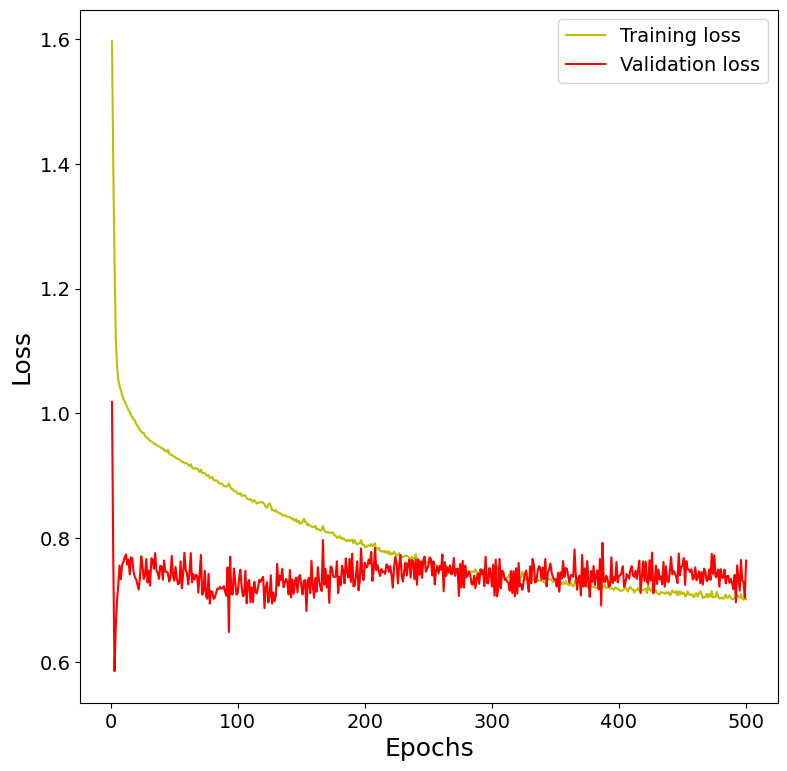

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(loss) + 1))

fig,ax = plt.subplots(figsize=(9,9))
plt.plot(epochs,loss, 'y', label="Training loss")
plt.plot(epochs,val_loss, 'r', label="Validation loss")
plt.xlabel("Epochs",fontsize = 18)
plt.ylabel("Loss",fontsize = 18)
# plt.title("Linear Regression",fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.savefig("loss.png")

In [135]:
ann_train = model.predict(x_train)
ann_test = model.predict(x_test)
rmse_train = mean_squared_error(y_train, ann_train, squared=True)
rmse_test = mean_squared_error(y_test, ann_test, squared=True)

5/5 [==============================] - 0s 610us/step


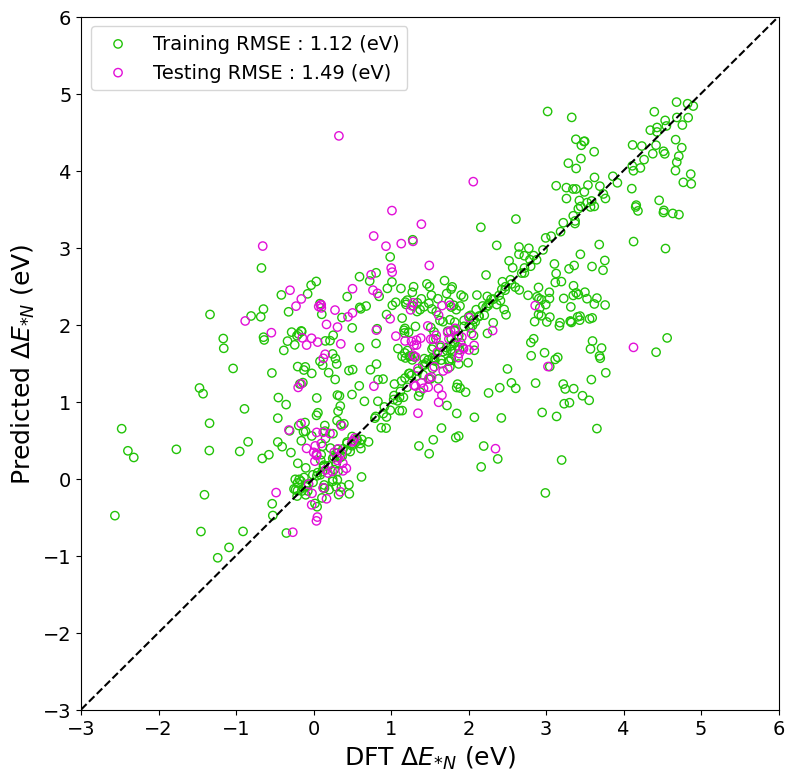

In [136]:
fig,ax = plt.subplots(figsize=(9,9))
plt.scatter(y_train,ann_train, color='#22C308',marker='o',
           facecolors = 'none', label=f"Training RMSE : {round(rmse_train,2)} (eV)")
plt.scatter(y_test,ann_test, color='#E210D8',marker='o',
           facecolors = 'none', label=f"Testing RMSE : {round(rmse_test,2)} (eV)")
plt.axline((0, 0), slope=1, color="black", ls="--")
plt.xlim([-3, 6])
plt.ylim([-3, 6])
plt.xlabel(r"DFT $\Delta E_{*N}$ (eV)",fontsize = 18)
plt.ylabel(r"Predicted $\Delta E_{*N}$ (eV)",fontsize = 18)
# plt.title("Linear Regression",fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.savefig("ANN.png")

In [14]:
n_split=10

for train_index,test_index in KFold(n_split).split(X_scaled):
    x_train,x_test=X_scaled[train_index],X_scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]

parameters = {'kernel' : ['rbf'],'C' : [1],'gamma' : ['auto']},
# parameters = {'C' : [1,5,10]},

svr = SVR()

clf = GridSearchCV(svr, parameters, cv=10, return_train_score=True)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [24]:
from sklearn.model_selection import ShuffleSplit
import numpy as np
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
a = cross_val_score(clf, x_train, y_train, cv=cv)
b = cross_val_score(clf, x_test, y_test, cv=cv)
print(np.std(a))
print(np.std(b))

0.05597297664021322
0.24431836864908046


In [19]:
svr = SVR(kernel='rbf', C=1, gamma="auto")
svr.fit(x_train, y_train)
svr_train = svr.predict(x_train)
svr_test = svr.predict(x_test)
svr_rmse_train = mean_squared_error(y_train, svr_train, squared=False)
svr_rmse_test = mean_squared_error(y_test, svr_test, squared=False)

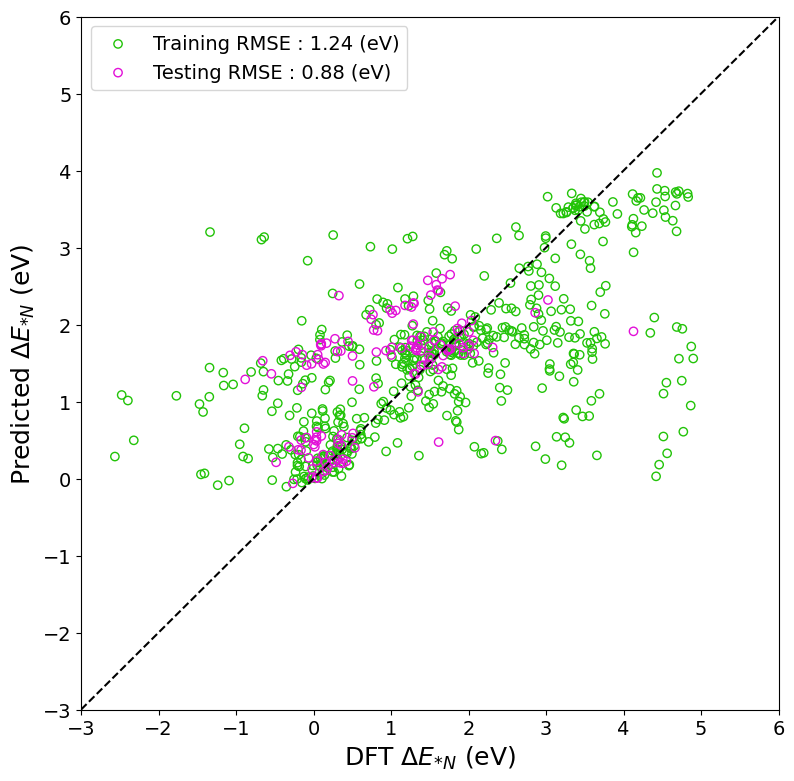

In [21]:
fig,ax = plt.subplots(figsize=(9,9))
plt.scatter(y_train,svr_train, color='#22C308',marker='o',
           facecolors = 'none', label=f"Training RMSE : {round(svr_rmse_train,2)} (eV)")
plt.scatter(y_test,svr_test, color='#E210D8',marker='o',
           facecolors = 'none', label=f"Testing RMSE : {round(svr_rmse_test,2)} (eV)")
plt.axline((0, 0), slope=1, color="black", ls="--")
plt.xlim([-3, 6])
plt.ylim([-3, 6])
plt.xlabel(r"DFT $\Delta E_{*N}$ (eV)",fontsize = 18)
plt.ylabel(r"Predicted $\Delta E_{*N}$ (eV)",fontsize = 18)
# plt.title("Linear Regression",fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.savefig("SVM_result.png")

In [ ]:
plt.errorbar(C, linear_clf.cv_results_['mean_test_score'], yerr=linear_clf.cv_results_['std_test_score'])